In [1]:
from sympy import *
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

init_printing()
%matplotlib inline

p2 = 2*np.pi

# Symmetric wheel with in-plane radial spokes

Segment of rim of arc length $2\pi R/n_s$ containing one spoke. By symmetry, $C$, $M$, $V$ are equal at the two ends. $\phi$ is half the angle between spokes.

![beam_diagram_1](beam_diagram_1.png)

Equilibrium of forces give

$$\sum F_x = 2V\sin{\phi} + C\cos{\phi} - C\cos{\phi}= 0$$
$$\sum F_y = 2C\sin{\phi} - T = 0$$

The shear force $V=0$, while the axial compression is

$$C = \frac{T}{2\sin{\phi}} \approx \frac{n_s T}{2\pi}$$

![beam_diagram_2](beam_diagram_2.png)

At an angle $\theta < \phi$, sum of forces and sum of moments about the right end gives

$$\sum F_1 = C - C'\cos{\theta} - V'\sin{\theta}$$

$$\sum F_2 = C'\sin{\theta} - V'\cos{\theta}$$

$$\sum M_r = -M + M' - CR(1-\cos{\theta}) = 0$$

## Mechanics and deformation

Now that the moment distribution is known, we can integrate $M(\theta)^2$ to get the strain energy in the entire arc $2\phi$. As is customary for slender beams, we neglect the strain energy associated with axial compression and shear.

$$U = 2 \int_0^\phi \frac{(M')^2}{2EI} \, r d\theta$$

The unknown end moment $M$ is determined by the condition that the rotation of the cross-section between spokes must be zero. From Castigliano's theorem:

$$\frac{\partial U}{\partial M} = 0$$

The inward displacement due to the internal moment alone is

$$v_M = \frac{\partial U}{\partial T}$$

In [2]:
r, R, EI, EA = symbols('r R EI EA', real=True)
M, C, T, C_t, V_t = symbols('M C T C_t V_t', real=True)
Tb = symbols('T_b', real=True)

theta, phi = symbols('theta phi', real=True)

# Solve for internal axial force and shear
CVsol = solve([Eq(C - C_t*cos(theta) - V_t*sin(theta)),
               Eq(C_t*sin(theta) - V_t*cos(theta))], [C_t, V_t])

C_t = CVsol[C_t]
V_t = CVsol[V_t]

M_t = M + R*C*(1-cos(theta))

# Integrate over one half-arc and multiply by 2 (symmetry)
U = 2 * R/(2*EI)*integrate(M_t**2, (theta, 0, phi))
Msol = solve(U.diff(M), M)[0]

v_M = U.subs([(M, Msol), (C, T/(2*sin(phi)))]).diff(T).simplify()

### Internal moment

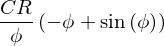

In [3]:
display(Msol)

### Radial displacement due to internal moment

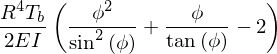

In [4]:
display(v_M.subs(T, 2*phi*R*Tb))

### Average radial displacement due to compressive hoop stress

The net average change in length of the rim centerline is $2\pi \Delta R$, corresponding to an average hoop strain $\Delta R/R$.

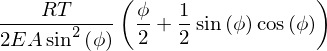

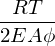

In [5]:
# Approximate displacement due to hoop stress
v_C = (C*R/EA).subs(C, T/(2*phi))

# Castigliano's method to get exact displacement due to hoop stress
U_EA = 2 * R/(2*EA)*integrate(C_t**2, (theta, 0, phi))
v_C_exact = U_EA.subs(C, T/(2*sin(phi))).diff(T)

display(v_C_exact)
display(v_C)

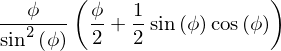

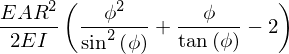

In [6]:
display(v_C_exact / v_C)
display(v_M / v_C)

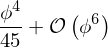

In [7]:
v_ratio_exact = (v_M/v_C_exact).subs(EA*R**2/EI, 1)

series(v_ratio_exact, phi)

## Relative importance of bending deflection

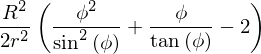

In [8]:
v_ratio = (v_M / v_C).simplify().subs(EA*R**2/EI, (R/r)**2)

display(v_ratio)

The relative importance of bending deflection compared with contraction of the centerline under compression is

$$\frac{v_M}{v_C} = \left(\frac{R}{r}\right)^2 f(\phi)$$

where

$$f(\phi) = \frac{1}{2} \left( \frac{\phi}{\sin{\phi}}+\cos{\phi} - 2\frac{\sin{\phi}}{\phi} \right)$$

The leading-order term of the Taylor series approximation of $f(\phi)$ is

$$f(\phi) \approx \frac{1}{45} \phi^4$$

Therefore, to a VERY close approximation:

$$\frac{v_M}{v_C} \approx \frac{1}{45} \left(\frac{R}{r}\right)^2 \left(\frac{\pi}{n_s}\right)^4$$

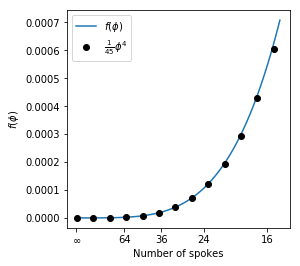

In [9]:
f_phi = lambdify(phi, v_ratio.subs(R/r, 1.0))

pp = np.linspace(0.001, 2*np.pi/15, 100)
fig, ax = plt.subplots(figsize=(4, 4))

ax.plot(pp, [f_phi(p) for p in pp], label=r'$f(\phi)$')
ax.plot(pp[::8], 1./45.*pp[::8]**4, 'ko', label=r'$\frac{1}{45}\phi^4$')

ax.set_xticks([0., p2/64, p2/36, p2/24, p2/16])
ax.set_xticklabels([r'$\infty$', 64, 36, 24, 16])

ax.set_xlabel('Number of spokes')
ax.set_ylabel(r'$f(\phi)$')

ax.legend(loc='best');

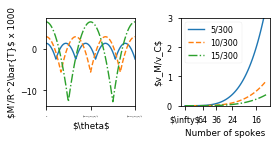

In [10]:
v_ratio_1 = lambdify(phi, v_ratio.subs(R/r, 300 / 5))
v_ratio_2 = lambdify(phi, v_ratio.subs(R/r, 300 / 10))
v_ratio_3 = lambdify(phi, v_ratio.subs(R/r, 300 / 15))

pp = np.linspace(0.001, 2*np.pi/14, 100)


with plt.style.context(('seaborn-paper')):
    fig, ax = plt.subplots(ncols=2, figsize=(4.0, 2.0))

    ax[1].plot(pp, [v_ratio_1(p) for p in pp], '-', label='5/300')
    
    ax[1].plot(pp, [v_ratio_2(p) for p in pp], '--', label='10/300')
    
    ax[1].plot(pp, [v_ratio_3(p) for p in pp], '-.', label='15/300')

    ax[1].set_xticks([0., p2/64, p2/36, p2/24, p2/16])
    ax[1].set_xticklabels([r'\$\infty\$', 64, 36, 24, 16])

    ax[1].set_xlabel('Number of spokes')
    ax[1].set_ylabel(r'\$v_M/v_C\$')

    ax[1].set_ylim([0., 3.])
    ax[1].set_yticks([0., 1., 2., 3.])
    
    ax[1].legend(loc='upper left')
    
    
    th = np.linspace(0., np.pi/4, 1000)
    
    ls = ['-', '--','-.']
    for ns, l in zip([36, 24, 16], ls):
        th_s = np.pi/ns
        
        ax[0].plot(th, -1000*(np.sin(th_s)/th_s - np.cos((th+th_s) % (2*th_s) - th_s)), l)
    
    ax[0].set_xlim([0., np.pi/4])
    ax[0].set_xticks([0., np.pi/8, np.pi/4])
    ax[0].set_xticklabels(['0', r'\$\frac{\pi}{8}\$', r'\$\frac{\pi}{4}\$'])
    plt.setp(ax[0].get_xticklabels(), fontsize=2)
    
    ax[0].set_xlabel(r'\$\theta\$')
    ax[0].set_ylabel(r"\$M'/R^2\bar{T}\$ x 1000")

    plt.tight_layout()
    plt.savefig('../figs/stress_analysis/radial_bulging_python.pdf')